**Table of contents**    
- [Introduction](#Introduction)    
  - [Process](#Process)    
- [Pre-Process Data](#Pre-Process-Data)    
    - [Import relevant packages](#Import-relevant-packages)    
    - [Read each csv file](#Read-each-csv-file)    
  - [Duplicate Values](#Duplicate-Values)    
    - [`orders` data frame](#orders-data-frame)    
    - [`products` dataframe](#products-dataframe)    
    - [`departments` data frame](#departments-data-frame)    
    - [`aisles` data frame](#aisles-data-frame)    
    - [`order_products` data frame](#order_products-data-frame)    
  - [Missing Values](#Missing-Values)    
    - [`products` data frame](#products-data-frame-1)    
    - [`orders` data frame](#orders-data-frame-1)    
    - [`order_products` data frame](#order_products-data-frame-1)    
    - [Odd Values](#Odd-Values)    
- [Analysis](#Analysis)    
  - [Time and Day](#Time-and-Day)    
    - [What time of day do people shop for groceries?](#What-time-of-day-do-people-shop-for-groceries)    
    - [What day of the week do people shop for groceries?](#What-day-of-the-week-do-people-shop-for-groceries)    
    - [How long do people wait until placing another order?](#How-long-do-people-wait-until-placing-another-order)    
    - [Weekend vs Weekday](#Weekend-vs-Weekday)    
  - [Customer Preferences](#Customer-Preferences)    
    - [Number of Orders per Customer](#Number-of-Orders-per-Customer)    
    - [Top Selling Products](#Top-Selling-Products)    
    - [Top Reordered Products](#Top-Reordered-Products)    
    - [Proportion of Reorders](#Proportion-of-Reorders)    
    - [Most reordered products by proportion](#Most-reordered-products-by-proportion)    
    - [First Cart Items](#First-Cart-Items)    
- [Conclusion](#Conclusion)    
  - [Time and Day](#Time-and-Day-1)    
  - [Customer Preferences](#Customer-Preferences-1)


# Introduction

Instacart, a grocery delivery company, requests insight into the shopping habits of their customers. Data is provided which they hope will uncover important answers to the following questions:

- Which hours and days are most orders being processed?

- How frequently do customers place orders?

- Are customer habits different between weekends and weekdays?

- How many customers re-order and how often?

- What proportion of items are a re-order?

- What are the top products that are:
    - purchased?
    - re-ordered?

    - the first items customers buy?

In answering these questions instacart may learn which products to recommend and to which customers at certain times. 

## 

Five tables have been provided. Each will be preprocessed for data exploration. Below is a data dictionary that lists the columns in each table along with a description.

`instacart_orders.csv`: each row corresponds to one order on the Instacart app

- `'order_id'`: ID number that uniquely identifies each order
- `'user_id'`: ID number that uniquely identifies each customer account
- `'order_number'`: the number of times this customer has placed an order
- `'order_dow'`: day of the week that the order placed (which day is 0 is uncertain)
- `'order_hour_of_day'`: hour of the day that the order was placed
- `'days_since_prior_order'`: number of days since this customer placed their previous order
     
`products.csv`: each row corresponds to a unique product that customers can buy
- `'product_id'`: ID number that uniquely identifies each product
- `'product_name'`: name of the product
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
- `'department_id'`: ID number that uniquely identifies each grocery department category

`order_products.csv`: each row corresponds to one item placed in an order
- `'order_id'`: ID number that uniquely identifies each order
- `'product_id'`: ID number that uniquely identifies each product
- `'add_to_cart_order'`: the sequential order in which each item was placed in the cart
- `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have

`aisles.csv`
- `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
- `'aisle'`: name of the aisle
    
`departments.csv`
- `'department_id'`: ID number that uniquely identifies each grocery department category
- `'department'`: name of the department

## Process

A thorough exploration of their data will require pre-processing and analysing the data.

# Pre-Process Data

Packages will be imported. Data will be saved. Null, missing, and odd values will all be checked and dealt with appropriately.

### Import relevant packages

In [1]:
# Import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read each csv file

Each dataset will be saved and info shown. Thi

In [2]:
# Read instacart_orders.csv file as orders
orders = pd.read_csv('data/instacart_orders.csv', sep=';')

# Show info 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
# Read products.csv as products
products = pd.read_csv('data/products.csv', sep=';')

# Show info
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
# Read aisles.csv as aisles
aisles = pd.read_csv('data/aisles.csv', sep=';')

# Show info
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
# Read departments.csv as aisles
departments = pd.read_csv('data/departments.csv', sep=';')

# Show info
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [6]:
# Read aisles.csv as aisles
order_products = pd.read_csv('data/order_products.csv', sep=';')

# Show info
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Duplicate Values

Find and deal with duplicate values.

### `orders` data frame

In [7]:
# Check for duplicated orders
# Print sum of duplicated orders
print('Number of duplicates = ', orders.duplicated().sum())

# Print duplicated orders
orders[orders.duplicated()]

Number of duplicates =  15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [8]:
# Remove duplicate orders
orders = orders.drop_duplicates()

**Conclusion**: Only one order ID should be given per order. Furthermore, all orders that have been duplicated occur on Wednesday (`order_dow` = 3) at 2am (`order_hour_of_day` = 2). These may be removed as it is rather unlikely that these orders were meant to be ordered twice at this time and day. Perhaps a data error occurred around this time. These duplicate values have thus been dropped.

### `products` dataframe

In [9]:
# Check for duplicate rows across all columns
products.duplicated().sum()

0

In [10]:
# Check for duplicates in product IDs column
products['product_id'].duplicated().sum()

0

**Conclusion**: There can only by one unique value for product IDs in this dataframe. None of these are found to have been duplicated.

### `departments` data frame

In [11]:
# Check for duplicate rows across all columns
departments.duplicated().sum()

0

In [12]:
# Check for duplicate department IDs
departments['department_id'].duplicated().sum()

0

**Conclusion**: No duplications exist in the departments dataframe.

### `aisles` data frame

In [13]:
# Check for duplicate rows in all columns
aisles.duplicated().sum()

0

In [14]:
# Check for duplicate department IDs
aisles['aisle_id'].duplicated().sum()

0

**Conclusion**: No duplications exist in the aisles dataframe.

### `order_products` data frame

In [15]:
# Check duplicates across all columns
order_products.duplicated().sum()

0

In [16]:
# Double check for any other tricky duplicates
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

**Conclusion**: This dataset combines order_id and product_id columns. Where both unique IDs are duplicated, the order may also be duplicated. However, there are none.

## Missing Values


### `products` data frame

From above, only values in the `product_name` column are missing.

In [17]:
# Find dataframe where product name is missing, save as missing_products
missing_products = products[products['product_name'].isna()]

# Print missing products
missing_products

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


It appears that all missing products come from aisle and department 21. This will be confirmed.

In [18]:
# Find unique aisles and departments in the products dataframe
unique_aisles = missing_products['aisle_id'].unique()
unique_department = missing_products['department_id'].unique()

# Print unique aisles and departments
print('Unique aisles = ', unique_aisles)
print('Unique departments = ', unique_department)

Unique aisles =  [100]
Unique departments =  [21]


In [19]:
# show aisle 100 in aisles dataframe
aisles[aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [20]:
# show department 21 in departments dataframe
departments[departments['department_id'] == 21]

,department_id,department
20,21,missing


In [21]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

**Conclusion**: Missing product names were associated with an aisle and department that were missing, thus the product names were filled as 'Unknown'.

### `orders` data frame

In [22]:
#Create new dataframe named missing_orders using nan values from 'days_since_prior_order' column
missing_orders = orders[orders['days_since_prior_order'].isna()]

In [23]:
#print value counts of order number to establish if customers have ordered before
missing_orders['order_number'].value_counts(dropna=False)

order_number
1    28817
Name: count, dtype: int64

**Conclusion**: As all missing values in days_since_prior_order equate to customer's first order, no mistake has been made. Keep missing values as is.

### `order_products` data frame

From above, only the 'add_to_cart_order' column contains missing values.

In [24]:
# Find min and max values of 'add_to_cart_order' column
print(order_products['add_to_cart_order'].min())
print(order_products['add_to_cart_order'].max())

1.0
64.0


In [25]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#Find list of unique order IDs named order_with_missing_values using nan values from above column
orders_with_missing_values = order_products[order_products['add_to_cart_order']
                                            .isna()]['order_id'].unique()

#find values in order_product dataframe where add_to_cart_order is na
orders_with_missing_values_df = order_products[(order_products['order_id'].isin(orders_with_missing_values))] 


In [26]:
# Check order id 
orders_with_missing_values_df.groupby('order_id').size().sort_values(ascending = True).head()

order_id
9310       65
747668     65
1598369    65
1677118    65
2170451    65
dtype: int64

All orders with missing values have more than 64 products as the minimum is given with 65. Thus, `add_to_cart_order` values will have missing values assigned to 999 (bigger than 64).

In [27]:
#Replace missing values
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].replace(np.nan, 999)

#Ensure that change from float to integer will not round values inappropriately
print(np.array_equal(order_products['add_to_cart_order'], order_products['add_to_cart_order']
                     .astype('int')))

True


In [28]:
#Convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

**Conclusion**: Missing values were found and replaced.

### Odd Values

Check that min and max values make sense.

- `order_hour_of_day`: only 24 values should exist (each hour of the day)
- `order_dow`: only 7 values should exist (each day of week)

In [29]:
#print min and max of 'order_hour_of_day' found in orders
print(orders['order_hour_of_day'].min())
print(orders['order_hour_of_day'].max())

0
23


In [30]:
#print min and max of 'order_dow' found in orders
print(orders['order_dow'].min())
print(orders['order_dow'].max())

0
6


No odd values exist.

# Analysis

Now that the data is ready, questions that were posed in the introduction will all be assessed. These can be broken down into:
- Time and Day
- Customer Preferences

## Time and Day

Relevant questions ask include:
- What time of day do customer shop generally?
- What day of the week do customers shop?
- How long do customer's wait before re-ordering?
- Do people shop similarly on weekdays or weekends?

All will be answered with reference to histograms, plotting the most common times and days that these questions apply to.

### What time of day do people shop for groceries?

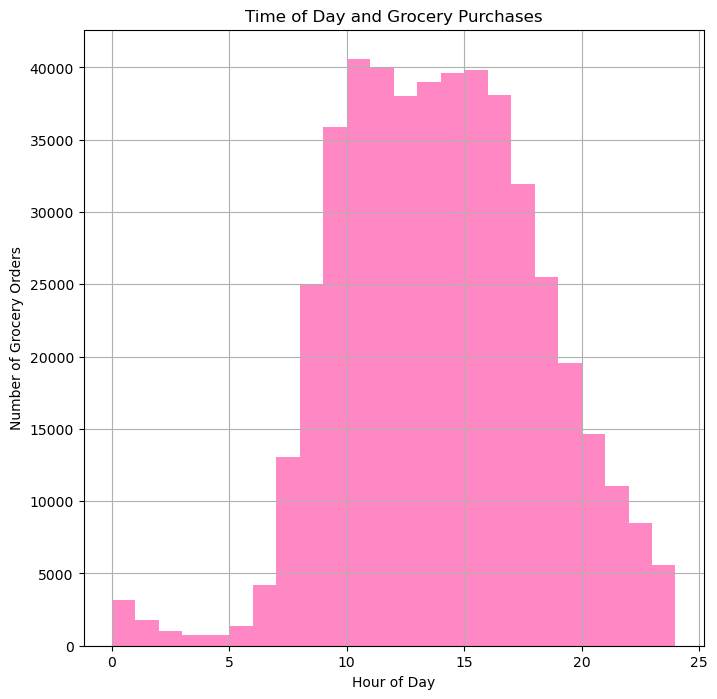

In [31]:
# Plot histogram of 'order_hour_of_day' column
orders['order_hour_of_day'].plot(title= 'Time of Day and Grocery Purchases', 
                                kind= 'hist', grid= True, alpha= .8, figsize= [8,8], 
                                color= 'hotpink', bins= np.arange(0,25,1))

# Add labels
plt.xlabel('Hour of Day')
plt.ylabel('Number of Grocery Orders')

# Show plot
plt.show()

Grocery shopping picks up at around 7:00am. People tend to buy the most in the 15th hour at just below 120,000 orders. This slows down at around 8pm.

### What day of the week do people shop for groceries?

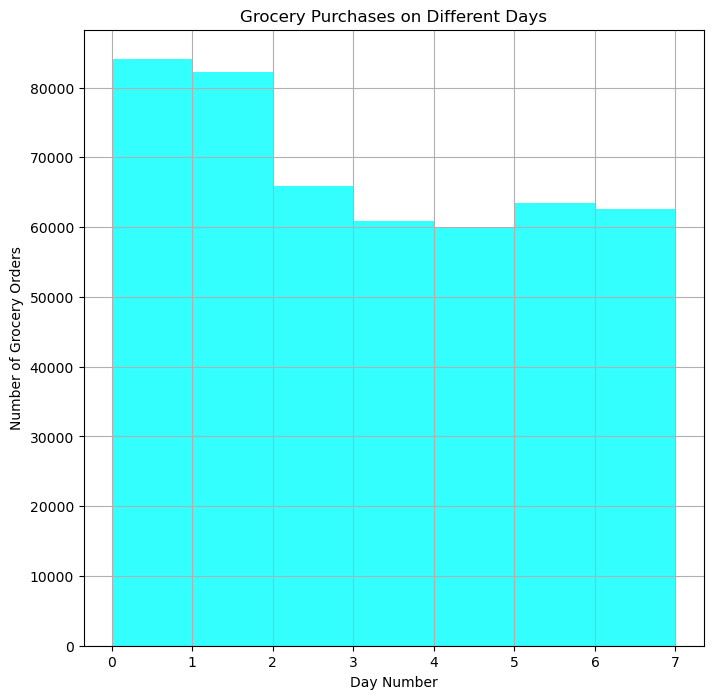

In [32]:
# Plot histogram of 'order_dow' column
orders['order_dow'].plot(title= 'Grocery Purchases on Different Days', 
                        kind='hist', grid=True, alpha=.8, figsize=[8,8],
                         bins= np.arange(0,8,1), color = 'aqua')

# Add labels
plt.xlabel('Day Number')
plt.ylabel('Number of Grocery Orders')

# Show plot
plt.show()

The most grocery shopping occurs on Monday and Tuesday at over 80,000 purchases.

### How long do people wait until placing another order?

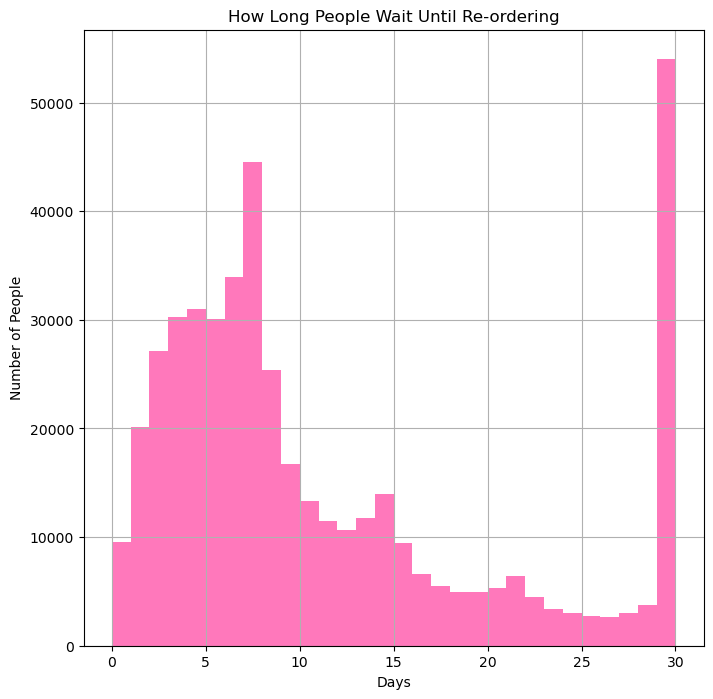

In [33]:
orders['days_since_prior_order'].plot(title= 'How Long People Wait Until Re-ordering', 
                        kind='hist', grid=True, alpha=.90, figsize=[8,8], 
                         color = 'hotpink',bins = np.arange(0,31,1))

# Add labels
plt.xlabel('Days')
plt.ylabel('Number of People')

# Show the plot
plt.show()

Most people tend to wait 7 days before ordering again. This is conveniently a week after they ordered last, suggesting that groceries are more likely bought on a weekly basis through instacart.

Conversely, people are least likely to wait 27 days. 

Note that values at 30 include all days after 30.

### Weekend vs Weekday

Do people shop similarly on weekdays or weekends? This will be answered comparing distributions between Wednesdays and Saturdays on an hourly basis.

In [34]:
#Create dataframe for Wednesday and Saturday values
wed_orders = orders[orders['order_dow'] == 3]
sat_orders =  orders[orders['order_dow'] == 6]

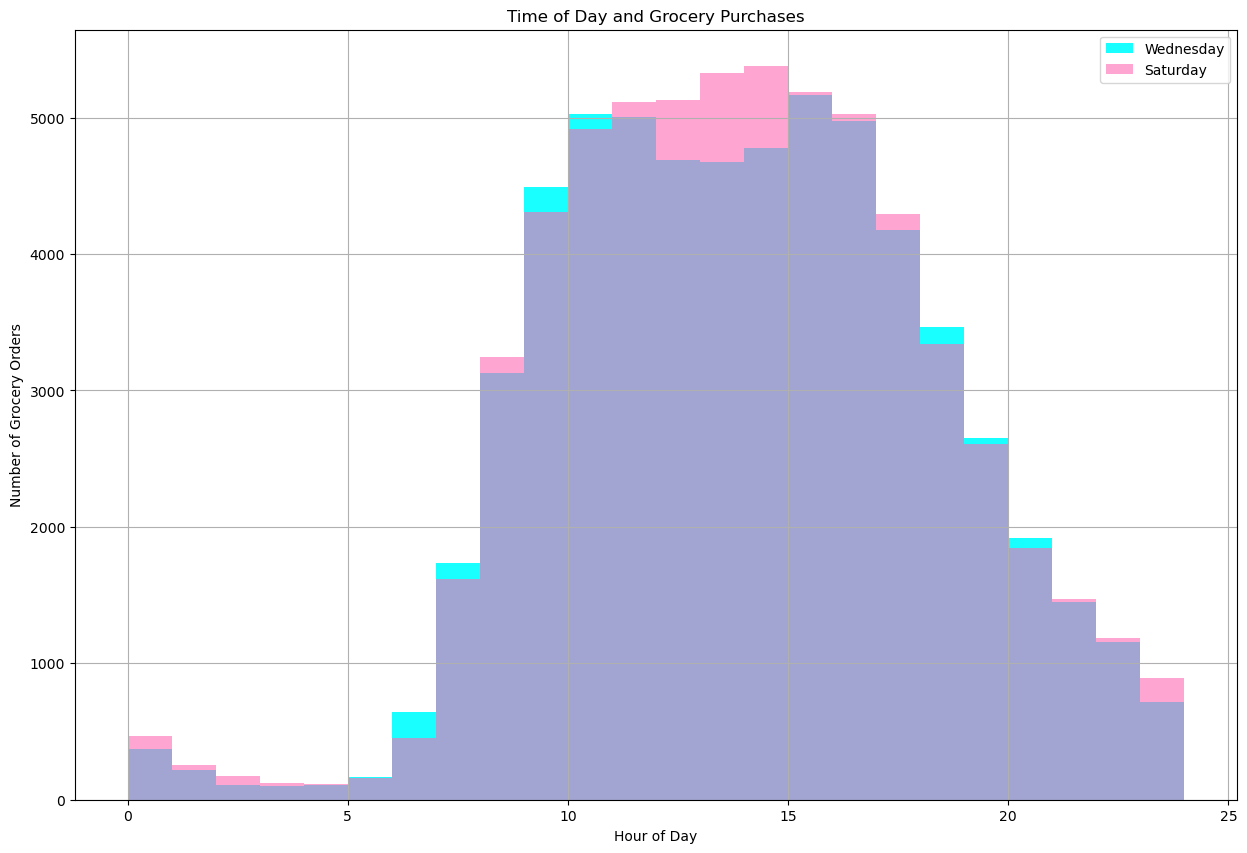

In [35]:
#plot Wednesday histogram
wed_orders['order_hour_of_day'].plot(title= 'Time of Day and Grocery Purchases', 
                                kind= 'hist', grid= True, alpha= 0.9, figsize= [15,10], 
                                color= 'aqua', bins= np.arange(0,25,1), label='Wednesday')

#plot Saturday histogram
sat_orders['order_hour_of_day'].plot(kind= 'hist', grid= True, alpha= 0.6, figsize= [15,10], 
                                color= 'hotpink', bins= np.arange(0,25,1), label = 'Saturday')

#add labels
plt.xlabel('Hour of Day')
plt.ylabel('Number of Grocery Orders')

#add legend
plt.legend(loc='upper right')

#show plot
plt.show()

Wednesday and Saturdays follow similar shopping patterns. Slight differences occurs at 7:00 am where Wednesday has more orders. Shopping picks up quickly, seeing increases of around 1000 orders per hour until 10:00 am. At around 12:00pm, Saturday shopping increases more than Wednesday's. Both peak over 5000 orders at around 2:00pm and 3:00pm. After this point, shopping sees a more gradual decrease than it's morning increase.

Gathering all these pieces tells a story. Customers are more likely to buy food from 10am to 7pm at the start of the week. From that time they are likely to reorder in one week past that time. No signficant difference seems to exist between ordering patterns between weekends and weekdays. Knowing this gives insights into when deliveries should be scheduled. 

## Customer Preferences

Questions that will be answered include:
- How many orders do customers make?
- What are the top selling products?
- For each product, what proportion of its orders are reorders?
- What are the top 20 items that people put in their carts first? 

### Number of Orders per Customer

The distribution of the number of orders that each customer has made will be plotted.

In [36]:
# Confirm start and end points for bins sizes of histogram
print(orders['order_number'].min())
print(orders['order_number'].max())

1
100


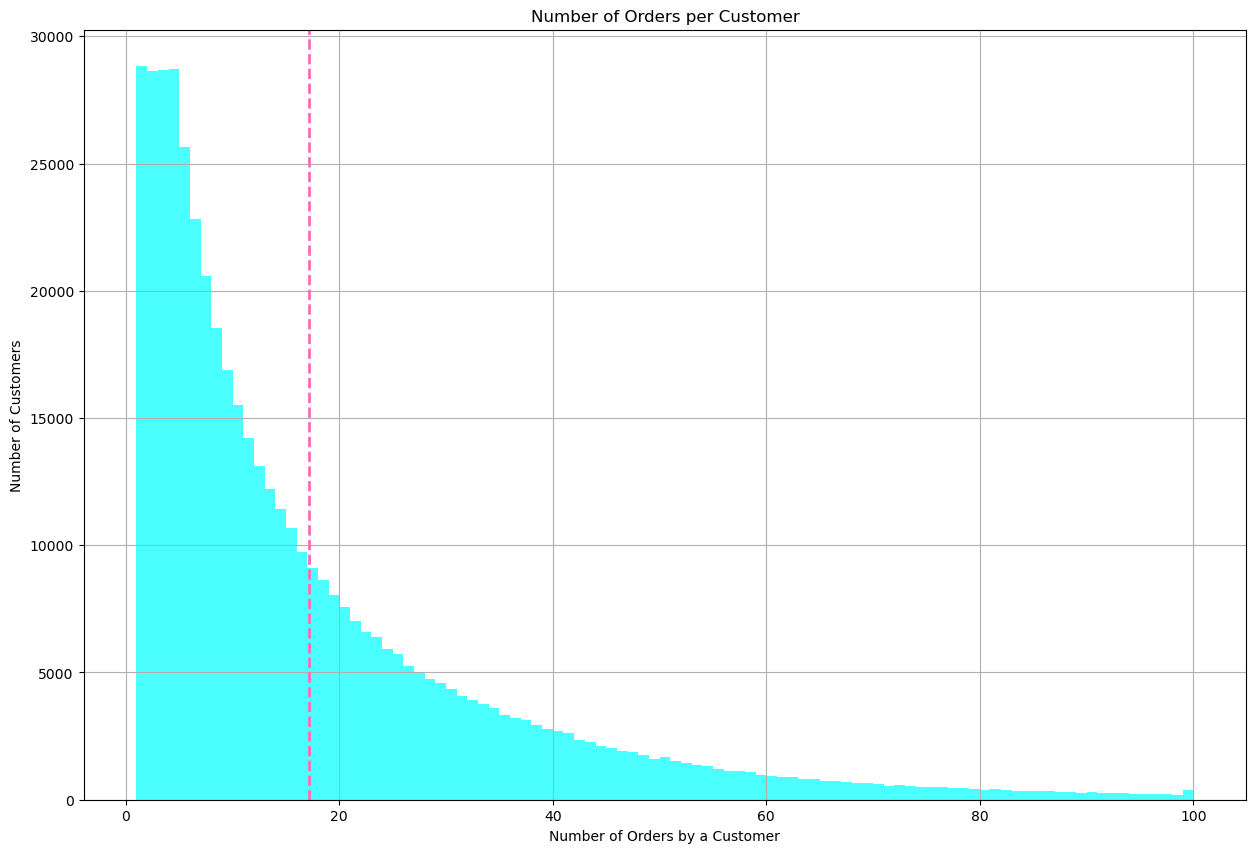

In [37]:
# Plot histogram of number of orders per customer
orders['order_number'].plot(title= 'Number of Orders per Customer', 
                            kind= 'hist', grid= True, alpha= 0.7, 
                            figsize= [15,10], color= 'aqua', 
                            bins= np.arange(1,101,1))

# Add labels
plt.xlabel('Number of Orders by a Customer')
plt.ylabel('Number of Customers')

# plot the mean
plt.axvline(orders['order_number'].mean(), color='hotpink', linestyle='dashed', linewidth=2)

# Show plot
plt.show()

The distribution is right skewed with the highest frequency of customers (28000) having only one order. This hovers before dropping rapidly at five orders. This suggests that most customers have only used instacart a handful of times. However, more than half have made over 15 orders using instacart.



### Top Selling Products

Top selling products will be identified. These items may be pushed more to the customer due to their popularity.

Popular product names are found by identifying the customer who bought the item and how much of it. To do so, the orders, products and order_product dataframes must be merged. Then a groupby performed.

In [38]:
# Merge order_products with relevant columns from orders
merge_op = order_products.merge(orders[['order_id','order_number']], how='left', on='order_id')

# Merge again with relevant product information
merge_op = merge_op.merge(products[['product_id','product_name']], how='left', on='product_id')

In [39]:
# Group product_name by order_id, count and sort values in descending order. Select top twenty.
top_ordered = merge_op.groupby('product_name')['order_id'].count().sort_values(ascending=False)

# Show top_ordered 
top_ordered[0:20]

product_name
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: order_id, dtype: int64

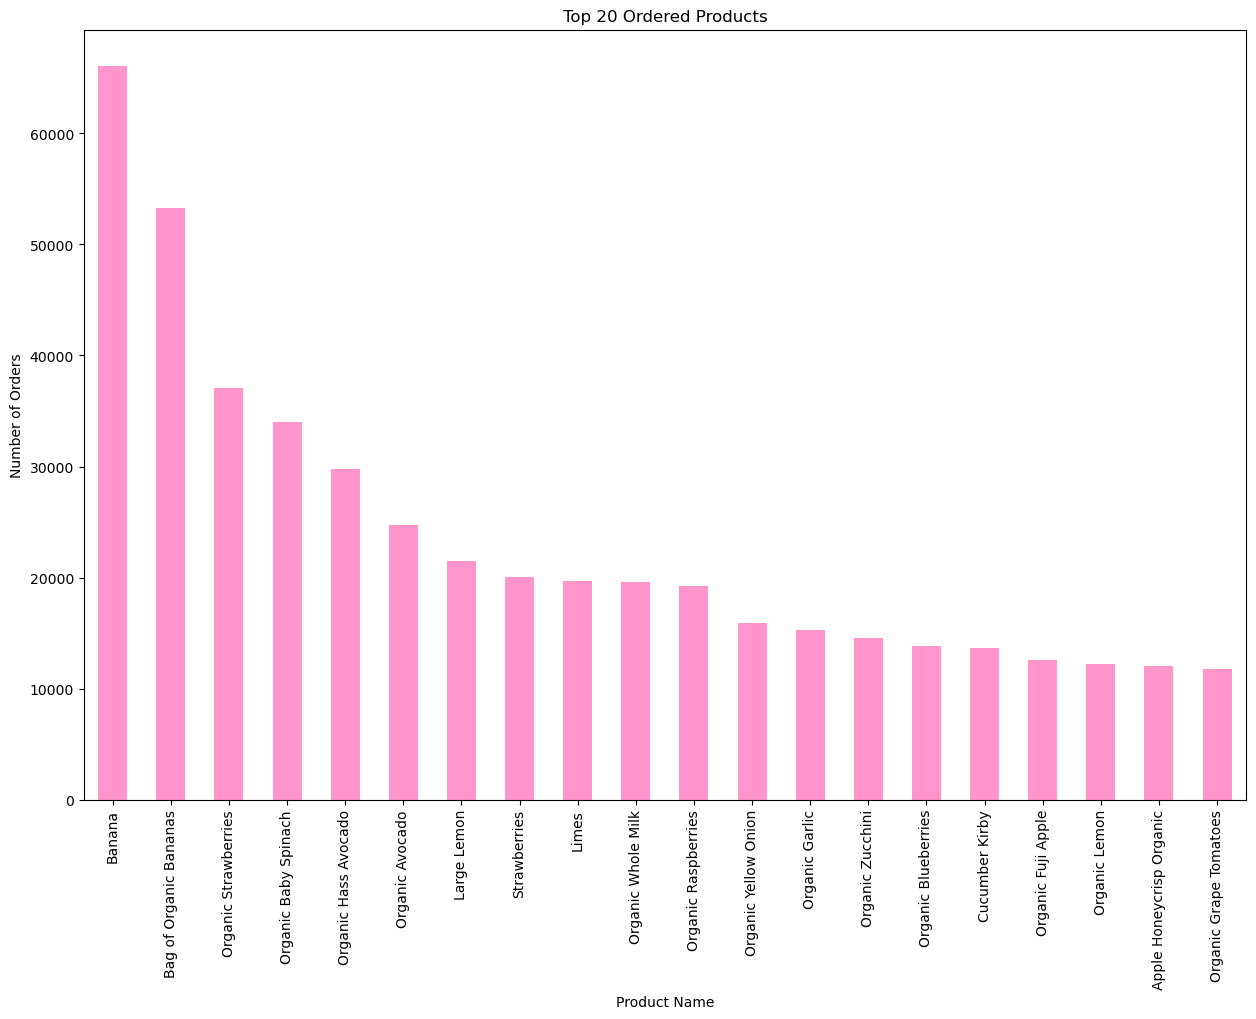

In [40]:

# create bar graph of top 20 ordered products
top_ordered[0:20].plot(kind='bar', title='Top 20 Ordered Products', 
                       figsize=[15,10], color='hotpink', alpha = 0.7)

# Add labels
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')

# Show plot
plt.show()

The top sold item is the banana with 66,050 orders. This is followed by organic bananas and a whole bunch of other fresh produce.

### Top Reordered Products

Items that appear on this list were likely enjoyed by the customer the first time around. Conversely, items that were a top seller, but not a top re-ordered seller may suggest that the product was not as well liked. 

Reordered products will be sliced from the above dataframe where products were bought a second time. The top 20 items will be found.

In [41]:
#select values from merged dataframe where customers are reordering item
reordered = merge_op[merge_op['reordered'] == True]

#Group product_name and product_id by product_id, count and sort values in descending order. Select top twenty.
reordered_sorted = reordered.groupby(['product_name'])['product_id'].count()

#Sort values by ascending and select first 20 rows to display top 
reordered_sorted.sort_values(ascending=False)[0:20]

product_name
Banana                      55763
Bag of Organic Bananas      44450
Organic Strawberries        28639
Organic Baby Spinach        26233
Organic Hass Avocado        23629
Organic Avocado             18743
Organic Whole Milk          16251
Large Lemon                 15044
Organic Raspberries         14748
Strawberries                13945
Limes                       13327
Organic Yellow Onion        11145
Organic Garlic              10411
Organic Zucchini            10076
Cucumber Kirby               9538
Organic Fuji Apple           8989
Apple Honeycrisp Organic     8836
Organic Blueberries          8799
Organic Lemon                8412
Organic Half & Half          8389
Name: product_id, dtype: int64

Bananas and strawberries remain supreme. Organic half and half has made the top 20 reordered list. However, grape tomatoes did not make the list the second time around suggesting that customers were not particularly happy with the product. Proportions of reorders will be calculated to make this analysis more niche.

### Proportion of Reorders

The proportion of reorders of each item will be found. This will be achieved by merging the total orders and reorders . Those with a high proportion will be more liked than those that are not. 

In [42]:
# merge top_20 and reordered_sorted
merged = pd.merge(top_ordered, reordered_sorted, how='outer', left_index=True, right_index=True)

# find difference between top_20 and reordered_sorted
merged['proportion'] = round((merged['product_id'] / merged['order_id']),2)

# change column names
merged.columns = ['total_orders', 'reorders', 'proportion']

# compare top 20 most sold products
top_merged = merged.sort_values(by='total_orders', ascending=False).head(30)

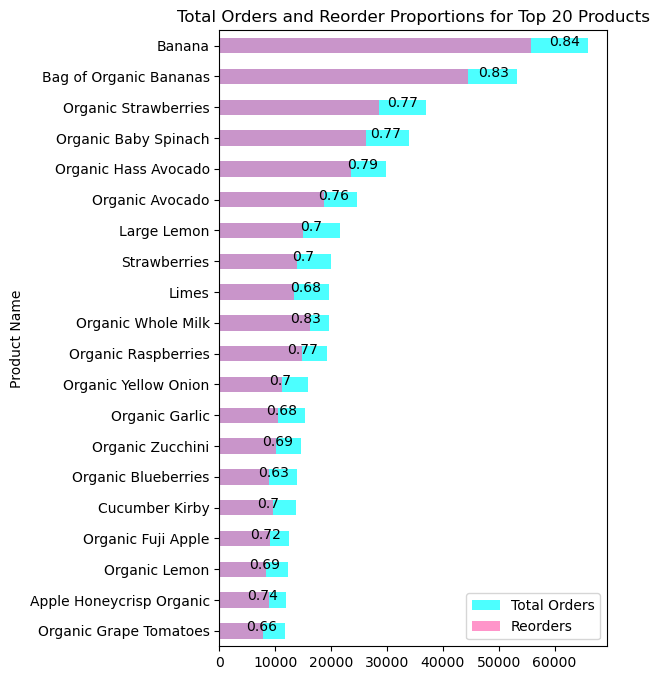

In [88]:
import matplotlib.pyplot as plt

# Reverse the order of the data
total_orders_reversed = top_merged['total_orders'][0:20][::-1]
reorders_reversed = top_merged['reorders'][0:20][::-1]
proportion_reversed = top_merged['proportion'][0:20][::-1]

# Plot total_ordered against reorders
total_orders_reversed.plot(kind='barh', title='Total Orders and Reorder Proportions for Top 20 Products', 
                           figsize=[5,8], color='aqua', alpha=0.7)

# Add in proportion of reorders as labels
for index, value in enumerate(total_orders_reversed):
    plt.text(value-7000, index, '' + str(proportion_reversed.iloc[index]) + '')

# Plot total
reorders_reversed.plot(kind='barh', color='hotpink', alpha=0.7)

# Add labels
plt.ylabel('Product Name')

# Add legend
plt.legend(['Total Orders', 'Reorders'])

# Show plot
plt.show()

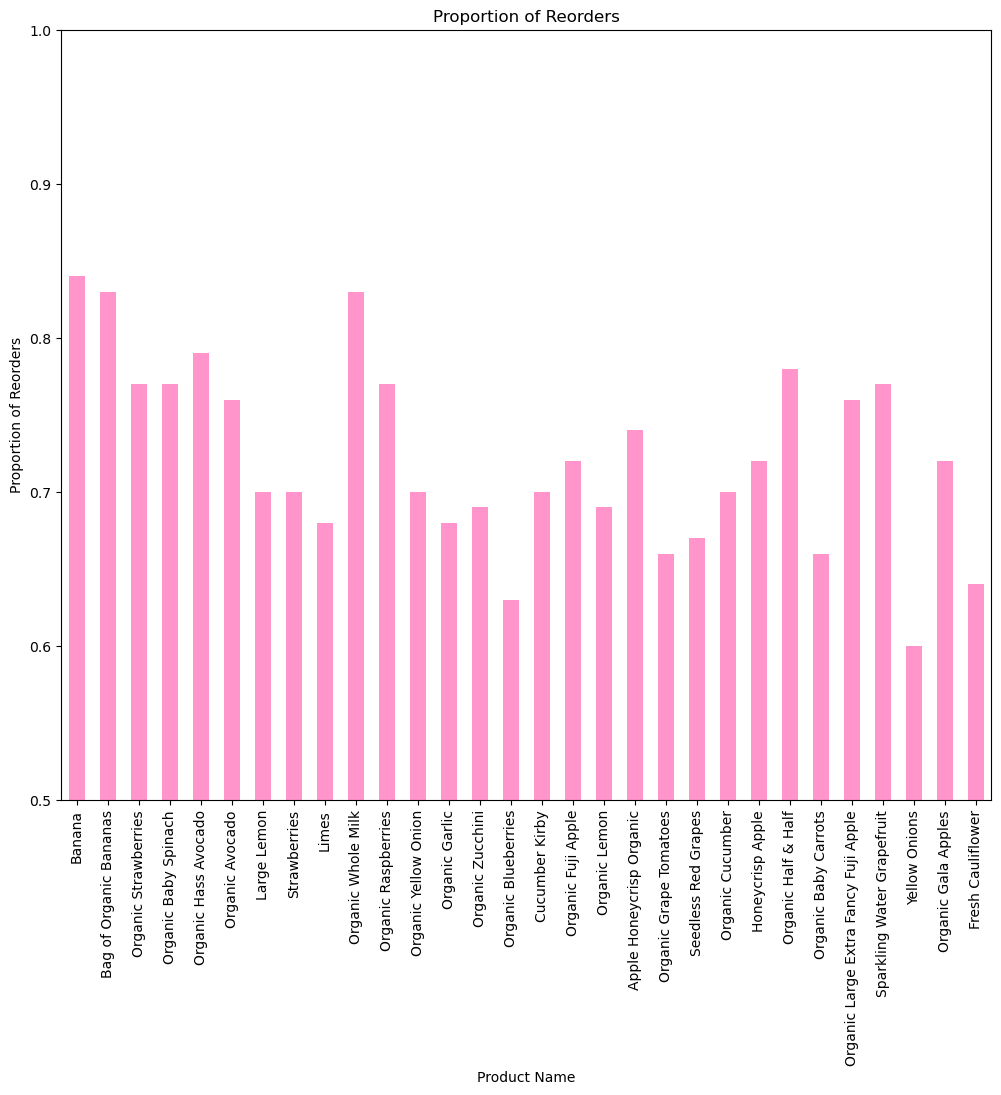

In [44]:
# plot proportion of reorders
top_merged['proportion'][0:30].plot(kind='bar', title='Proportion of Reorders', 
                             figsize=[12,10], color='hotpink', alpha = 0.7)

# start y axis at 0.5
plt.ylim(0.5, 1)

# Add labels
plt.xlabel('Product Name')
plt.ylabel('Proportion of Reorders')

# Show plot
plt.show()

This graph suggests that whilst organic blueberries are bought more frequently, they are not reordered as much in proportion to all the most popular foods, excluding yellow onions. This may be because these foods, along with strawberries, limes, tomatoes, lemons, garlic, and zuccini are easier to spoil during transportation or harder to determine ripeness. However, these are theories and further analysis would be needed to determine correlation levels.

### Most reordered products by proportion

Products that are most reordered with over 40 total orders will be found. These products may show potential to future customers.

In [45]:
# show products with the highest proportion of reorders with more than 40 orders
most_reordered = merged[merged['total_orders'] > 40].sort_values(by='proportion', ascending=False).head(20)

# Show most reordered by proportion
most_reordered

,total_orders,reorders,proportion
product_name,,,
DanActive Vanilla Probiotic Dairy Drink,65,59.0,0.91
Rehab Tea + Lemonade + Energy,43,39.0,0.91
Lo-Carb Energy Drink,63,56.0,0.89
Whole Wheat Multigrain Pop Cakes,53,47.0,0.89
Organic Raspberry Mate Energy Drink,65,58.0,0.89
Lemon Lime Seltzer,66,59.0,0.89
Purified Water- 9.5pH+,57,50.0,0.88
Nonfat Light Probiotic Drink,48,42.0,0.88
Half And Half Ultra Pasteurized,397,348.0,0.88


Interestingly most of these items are drinks and likely have a longer shelf life too. These may be of interest to promote to customers as they have high reorder rates.

### First Cart Items

Products will be ranked depending on how many customers choose this item to be their first item in their cart. This can be done by slicing the merge_op dataframe where `add_to_cart_order` is equal to 1. The result will be grouped similarly to the top_ordered dataframe.

In [46]:
#select values from merged dataframe where customers are reordering item
top_cart = merge_op[merge_op['add_to_cart_order'] == 1]

#Group product_name and product_id by product_id, count and sort values in descending order. Select top twenty.
top_cart_sorted = top_cart.groupby(['product_name'])['product_id'].count()

#Sort values by ascending and select first 20 rows to display top 
top_cart_sorted = top_cart_sorted.sort_values(ascending=False)[0:20]

#Print values
print(top_cart_sorted)

product_name
Banana                         15562
Bag of Organic Bananas         11026
Organic Whole Milk              4363
Organic Strawberries            3946
Organic Hass Avocado            3390
Organic Baby Spinach            3336
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2308
Organic Raspberries             2024
Sparkling Water Grapefruit      1914
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1370
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1310
Half & Half                     1309
Organic Yellow Onion            1246
Name: product_id, dtype: int64


Interestingly, soda, sparkling water grapefruit and varieties of milk have made the cut after not reaching the top 20 items ordered overall. Whole milk also rises above strawberries.

# Conclusion

## Time and Day

Customers are more likely to buy food from 10am to 7pm on a Monday or Tuesday. From that time they are likely to reorder in one week past that time. No signficant difference seems to exist between ordering patterns between weekends and weekdays. Knowing this gives insights into when deliveries should be scheduled. 

## Customer Preferences

Most customers have reordered atleast 15 times, however, over 100,000 have also reordered less than 5 times leaving room for growth. 

Top selling products include generic fruit and vegetable products as well as milk. Bananas and organic bananas reign supreme and account for over 110,000 orders. 

Other top foods such as blueberries, onions, strawberries, limes, tomatoes, lemons, garlic, and zuccini are not reordered as much as other top foods. This may be due to their ability to spoil easier, however, more testing is required.

Foods with the highest reorder proportions are mostly drinks. These include probiotics, energy drinks, milk, soda water and purified water. These products could be a good fit for future advertisement as they show that they have been liked by customers more than other products. Interestingly, these items show a longer shelf life than current top sellers.

Items that go into the cart first mimic those that are top sellers. This may indicate that consumers are certain on what they want going into instacart. Perhaps this can change with further targetting of well liked products such as those mentioned above.
